In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,A Lélek órása,1923
1,Aizaugusa gravi viegli krist,1986
2,Agliyorum,1988
3,0_1_0,2008
4,97 fung lau mung,1994


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,The Core,2003,Alejandro Abellan,actor,U.S.S. Soldier,NaN
1,Il momento di uccidere,1968,Remo De Angelis,actor,Dago,9
2,Across the Divide,1921,Thomas Delmar,actor,Dago,4
3,Revan,2012,Diego James,actor,Dago,NaN
4,Un homme marche dans la ville,1950,Fabien Loris,actor,Dago,12


In [27]:
# What are the ten most frequent movie names of all time?

titles.title.value_counts().head(10)

Carmen                  20
Hamlet                  20
Anna Karenina           16
Kismet                  14
Macbeth                 14
Anna                    13
Love                    13
The Three Musketeers    13
Maya                    13
Underground             12
dtype: int64

In [59]:
# Which three years of the 1930s saw the most films released?

t = titles
t = t[t.year // 10 == 193]
t.year.value_counts().head(3)

1936    1795
1937    1787
1938    1785
dtype: int64

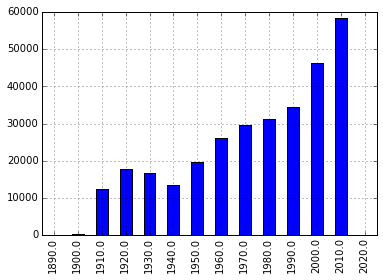

In [58]:
# Plot the number of films that have been released each decade.

t = titles
(t.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

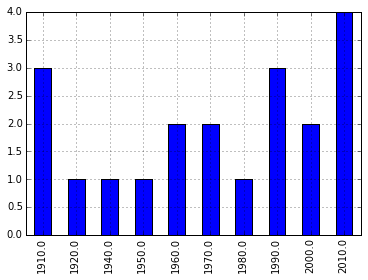

In [50]:
# Plot the number of "Hamlet" films made each decade.

t = titles
t = t[t.title == 'Hamlet']
(t.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

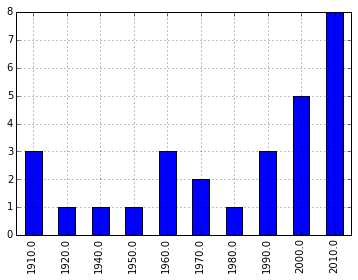

In [63]:
# The IMDB uses Roman numerals like "Hamlet (II)"
# if several films used the same name in a single year.
# Produce the plot for the previous question,
# but include Hamlet films with numerals as well.

def is_hamlet(df):
    return df.title.str.startswith('Hamlet (') | (df.title == 'Hamlet')

t = titles
t = t[is_hamlet(t)]
(t.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

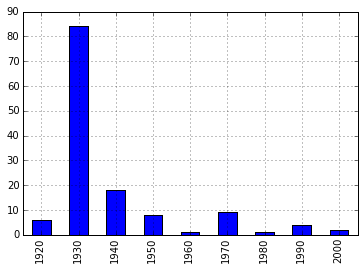

In [92]:
# Plot the number of "Rustler" characters in film each decade.

c = cast
c = c[c.character == 'Rustler']
(c.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

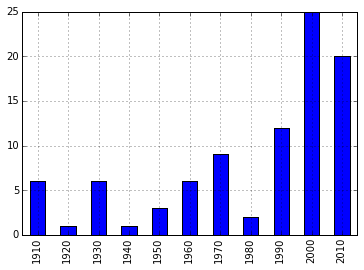

In [82]:
# Plot the number of "Batman" characters in film each decade.

c = cast
c = c[c.character == 'Hamlet']
(c.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

In [94]:
# What are the 11 most frequent character names in movie history?

cast.character.value_counts().head(11)

Himself      24293
Dancer       11697
Extra         8865
Reporter      7792
Doctor        7666
Herself       7501
Policeman     7245
Student       6694
Nurse         6636
Bartender     6298
Zombie        5785
dtype: int64

In [97]:
# Who are the 10 people most often credited as "Herself" in film history?

c = cast
c[c.character == 'Herself'].name.value_counts().head(10)

Queen Elizabeth II    14
Joyce Brothers        14
Denise Austin         10
Margaret Thatcher      9
Joan Rivers            8
Queen Mary             8
Cosey Fanni Tutti      7
Brigitte Bardot        7
Mary Jo Pehl           7
Petula Clark           7
dtype: int64

In [98]:
# Who are the 10 people most often credited as "Himself" in film history?

c = cast
c[c.character == 'Himself'].name.value_counts().head(10)

Adolf Hitler             104
Richard Nixon             43
John F. Kennedy           33
Ronald Reagan             30
Amitabh Bachchan          25
Ron Jeremy                24
George W. Bush            24
Franklin D. Roosevelt     23
Josip Broz Tito           23
Martin Luther King        22
dtype: int64

In [120]:
# Which actors or actresses appeared in the most movies in the year 1945?

cast[cast.year == 1945].name.value_counts().head(10)

Emmett Vogan        39
Sam Harris (II)     30
Harold Miller       28
Bess Flowers        28
Nolan Leary         27
Frank O'Connor      26
Charles Sullivan    24
Franklyn Farnum     24
Edmund Cobb         24
Tom London          24
dtype: int64

In [121]:
# 2. Which actors or actresses appeared in the most movies in the year 1985?

cast[cast.year == 1985].name.value_counts().head(10)

Mammootty           34
Shakti Kapoor       26
Mohanlal            22
Sukumari            19
Satyendra Kapoor    17
Kader Khan          16
Asrani              16
Rajesh Khanna       15
Aruna Irani         15
Raj Babbar          15
dtype: int64

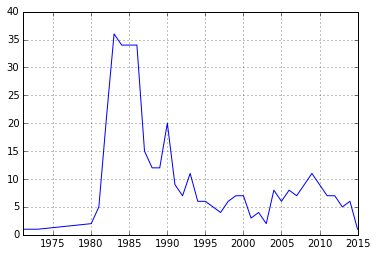

In [148]:
# Plot how many roles Mammootty has played each year over his career.

cast[cast.name == 'Mammootty'].year.value_counts().sort_index().plot()

In [153]:
# What are the 10 most frequent roles that start with the phrase "Patron in"?

c = cast
c[c.character.str.startswith('Patron in ')].character.value_counts().head(10)

Patron in Frisky Rabbit         16
Patron in Chinese Restaurant     9
Patron in the Coffee House       9
Patron in Billiard Parlor        5
Patron in Bar                    4
Patron in Restaurant             3
Patron in cabaret                3
Patron in restaurant             3
Patron in Club                   3
Patron in Quiet Bar              2
dtype: int64

In [175]:
# What are the 10 most frequent roles that start with the word "Science"?

c = cast
c[c.character.str.startswith('Science')].character.value_counts().head(10)

Science Teacher         53
Science Student          8
Science Fair Student     8
Science Fair Judge       6
Science Reporter         5
Science Club Member      5
Science Kid              4
Science Promo Cadet      4
Science Officer          3
Science teacher          3
dtype: int64

In [185]:
# Sort by year the movies in which Judi Dench has acted,
# and guess whether you can see a trajectory in his `n` value.

c = cast
c[c.name == 'Judi Dench'].sort('year')

,title,year,name,type,character,n
3258378,The Third Secret,1964,Judi Dench,actress,Miss Humphries,12
53109,A Study in Terror,1965,Judi Dench,actress,Sally,8
321282,He Who Rides a Tiger,1965,Judi Dench,actress,Joanne,2
699283,Four in the Morning,1965,Judi Dench,actress,Wife,2
1716707,A Midsummer Night's Dream,1968,Judi Dench,actress,Titania,16
1939439,Luther,1974,Judi Dench,actress,Katherine,7
3379822,Dead Cert,1974,Judi Dench,actress,Laura Davidson,2
3373064,A Room with a View,1985,Judi Dench,actress,"Eleanor Lavish, a novelist",7
3395889,Wetherby,1985,Judi Dench,actress,Marcia Pilborough,3
3376654,84 Charing Cross Road,1987,Judi Dench,actress,Nora Doel,3


In [184]:
# Sort by year the movies in which Cary Grant acted,
# and guess whether you can see a trajectory in his `n` value.

c = cast
c[c.name == 'Cary Grant'].sort('year')

,title,year,name,type,character,n
2282376,Blonde Venus,1932,Cary Grant,actor,Nick Townsend,3
2338273,Merrily We Go to Hell,1932,Cary Grant,actor,'DeBrion' in play,9
2341589,Madame Butterfly,1932,Cary Grant,actor,Lieutenant B.F. Pinkerton,2
2352398,This Is the Night,1932,Cary Grant,actor,Stephen Mathewson,5
925776,Merrily We Go to Hell,1932,Cary Grant,actor,Charlie Baxter,9
412390,Sinners in the Sun,1932,Cary Grant,actor,Ridgeway,8
2341270,Hot Saturday,1932,Cary Grant,actor,Romer Sheffield,1
2363161,Devil and the Deep,1932,Cary Grant,actor,Lt. Jaeckel,4
1687488,Alice in Wonderland,1933,Cary Grant,actor,Mock Turtle,10
1471854,I'm No Angel,1933,Cary Grant,actor,Jack Clayton,2


In [208]:
# How many leading (n=1) roles were available to actors,
# and how many to actresses, in the 1950s?

c = cast
c = c[c.year // 10 == 195]
c = c[c.n == 1]
c.type.value_counts()

actor      8050
actress    3765
dtype: int64

In [209]:
# How many supporting (n=2) roles were available to actors,
# and how many to actresses, in the 1950s?

c = cast
c = c[c.year // 10 == 195]
c = c[c.n == 2]
c.type.value_counts()

actor      5632
actress    5543
dtype: int64

In [210]:
# How many total roles were available for actors,
# and how many for actresses, over the 1950s?

c = cast
c = c[c.year // 10 == 195]
c.type.value_counts()

actor      178789
actress     69946
dtype: int64